## Comparing distributions (KL-divergence)

After generating distributions of our data, it would be handy to quantitatively measure the similarity of two distributions. There are many different ways of comparing continuous distributions from fields such as probability, statistics and information theory. Once such method is the Kullback-Leibler (KL) divergence.

The Kullback-Leibler (KL) divergence is a method for comparing the statistical distance between two probability distributions by measuring the entropy of a distribution relative to the other. Let $P$ and $Q$ be two probability distributions defined over the sample space $\mathcal{X}$. The
KL divergence is defined as
$$ \textrm{D}_{KL}(P ||Q) = \sum_\mathbf{x \in \mathcal{X}} P(\mathbf{x}) \log \left( \frac{P(\mathbf{x})}{Q(\mathbf{x})}\right). $$
Formally, $D_{KL} (P||Q)$ measures the expected logarithmic difference between the probabilities $P$ and $Q$, with the expectation taken under the distribution defined by $P$. For more information on the KL-divergence, see the [original paper](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-1/On-Information-and-Sufficiency/10.1214/aoms/1177729694.full). Think of it as comparing two maps to the same destination—if $Q$ gives very different directions from $P$, the divergence is large. Whereas if $Q$ gives very similar directions to those *expected* from knowing $P$, then the divergence is small.

In this tutorial, we demonstrate how to compare two spatial distributions in MuSpAn using the KL-divergence. We'll start by loading in a dataset with distinct spatial features.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Architecture
Number of objects: 5991
Collections: ['Cell centres']
Labels: ['Celltype'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

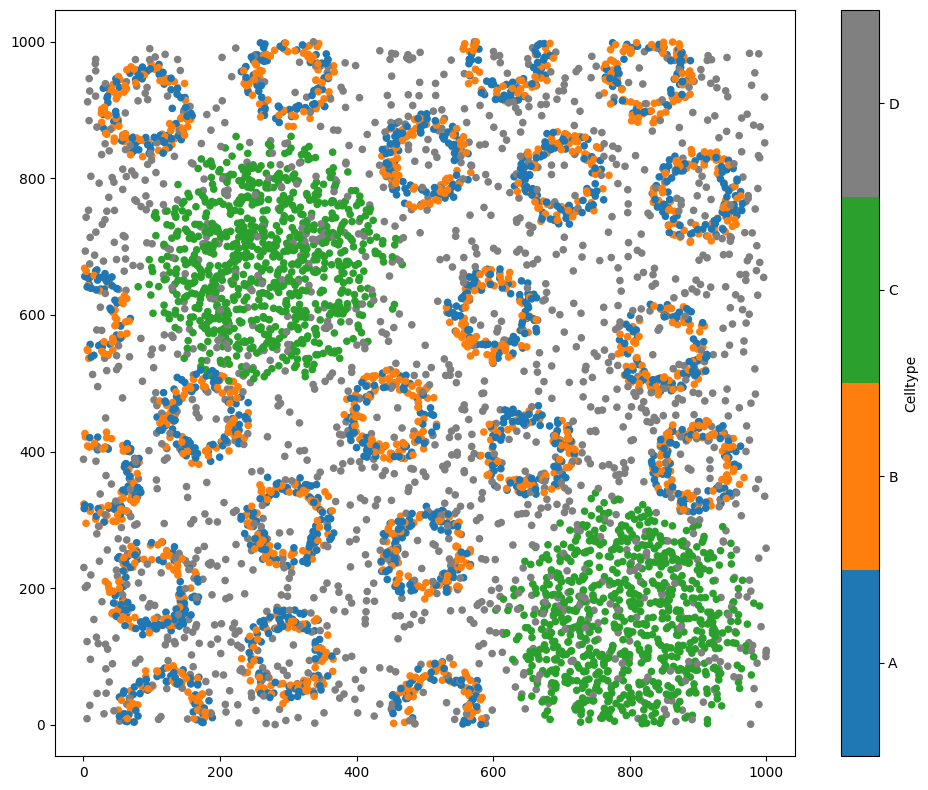

In [1]:
import muspan as ms
import numpy as np
import matplotlib.pyplot as plt

# Load the example domain 'Synthetic-Points-Architecture' from the muspan dataset
domain = ms.datasets.load_example_domain('Synthetic-Points-Architecture')

# Visualise the domain, colouring by 'Celltype'
ms.visualise.visualise(domain, color_by='Celltype')

Now we have some spatial data, we'll generate a smooth representation of each Celltype using `kernel_density_estimation` function as demonstrated in the 'Converting points into a continuum' tutorial.

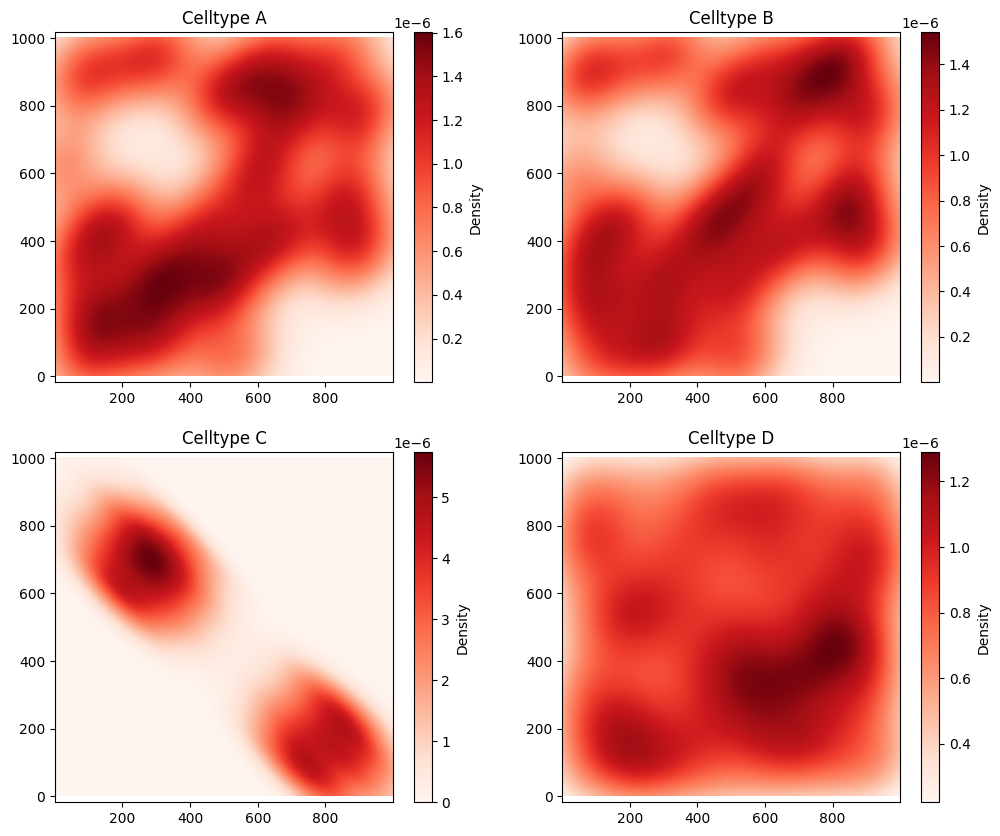

In [2]:
# Perform kernel density estimation (KDE) for each cell type in the domain
kde_A = ms.distribution.kernel_density_estimation(
    domain,
    population=('Celltype', 'A')
)
kde_B = ms.distribution.kernel_density_estimation(
    domain,
    population=('Celltype', 'B')
)
kde_C = ms.distribution.kernel_density_estimation(
    domain,
    population=('Celltype', 'C')
)
kde_D = ms.distribution.kernel_density_estimation(
    domain,
    population=('Celltype', 'D')
)

# Create a figure with 4 subplots to visualise the KDE heatmaps
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ms.visualise.visualise_heatmap(domain, kde_A, ax=ax[0, 0])
ax[0,0].set_title('Celltype A')

ms.visualise.visualise_heatmap(domain, kde_B, ax=ax[0, 1])
ax[0,1].set_title('Celltype B')

ms.visualise.visualise_heatmap(domain, kde_C, ax=ax[1, 0])
ax[1,0].set_title('Celltype C')

ms.visualise.visualise_heatmap(domain, kde_D, ax=ax[1, 1])
ax[1,1].set_title('Celltype D')

# Display the figure
plt.show()

We can compute the KL-divergence of these distributions using the `kl_divergence` function in the `distribution` submodule of MuSpAn. This function only requires two distributions, $P$ and $Q$ as inputs with the restriction that they must be the same size. This could be 1-dimensional distibutions, 2-dimensional distributions, ... etc, as long as they are the same size, we can compute the divergence between them.

We'll compute this for a couple of our distrubutions above.

In [3]:
# Calculate the KL-divergence between KDE of Celltype C and KDE of Celltype A
kl_divergence_C_A = ms.distribution.kl_divergence(kde_C, kde_A)

# Calculate the KL-divergence between KDE of Celltype A and KDE of Celltype C
kl_divergence_A_C = ms.distribution.kl_divergence(kde_A, kde_C)

# Print the KL-divergence values
# Note: KL-divergence is not symmetric, i.e., KL(C||A) is not necessarily equal to KL(A||C)
print("The KL-divergence from C to A is, D_{KL}(C||A) =", kl_divergence_C_A)
print("The KL-divergence from A to C is, D_{KL}(A||C) =", kl_divergence_A_C)


The KL-divergence from C to A is, D_{KL}(C||A) = 2.5429656130400486
The KL-divergence from A to C is, D_{KL}(A||C) = 26.57156899863893


Note the divergence is not symmetric! The divergence is relative to the initial distribution we gave (again this idea of new information relative to the existing information). Here, we have it is much more probable to expect the location of the Celltype A if we know the location of C intially. Whereas, if we knowing initially the probability of finding Celltype A in our domain, it is much more 'surprising' to learn about the probability of the locations of Celltype, as they are highly aggregated in comparison.

To demonstrate this further, let's run through all combinations of the KL-divergence for the distributions above.

(<Figure size 700x600 with 2 Axes>, <Axes: >)

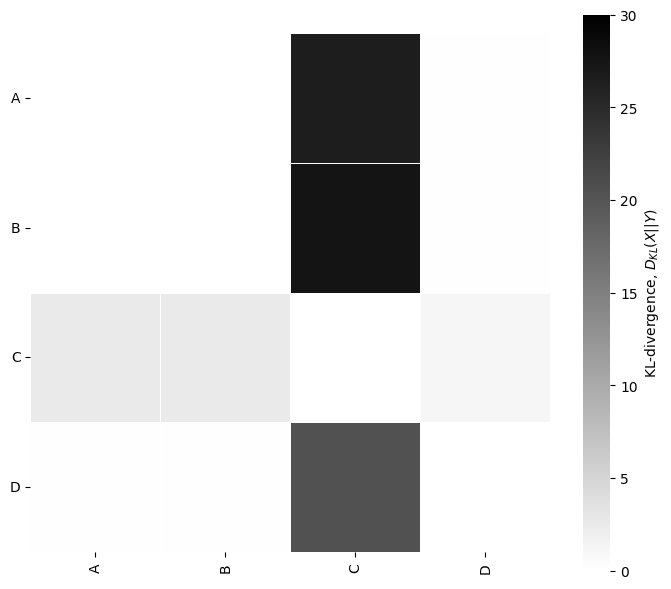

In [4]:
# Create an empty array to store all the KL-divergence values
all_divergence = np.empty((4, 4))

# Create a list of all the KDEs
list_of_kdes = [kde_A, kde_B, kde_C, kde_D]

# Calculate the KL-divergence for each pair of KDEs
for i, kde1 in enumerate(list_of_kdes):
    for j, kde2 in enumerate(list_of_kdes):
        all_divergence[i, j] = ms.distribution.kl_divergence(kde1, kde2)

# Create a figure to visualise the KL-divergence matrix
fig, ax = plt.subplots(figsize=(7, 6))

# Visualise the KL-divergence matrix as a heatmap
ms.visualise.visualise_correlation_matrix(
    all_divergence,
    categories=['A', 'B', 'C', 'D'],
    colorbar_limit=[0, 30],
    colorbar_label='KL-divergence, $D_{KL}(X||Y)$',
    ax=ax,
    cmap='gist_gray_r',
    center=15
)

We see a similar story when examining all combinations of the KL-divergence. In particular, the divergence between A and D, (and B and D) is almost 0 as there is very little difference between the distributions, whilst C is generating the largest divergence for all distributions as it's distribution is very different in comparision.


In this tutorial, we explored how to compute KL-Divergence to compare probability distributions of spatial data. By leveraging this metric, we can quantify differences between spatial patterns, helping to assess how well one distribution approximates another. For more information on the KL-divergence, check out our documentation.
